<a href="https://colab.research.google.com/github/JaySanthanam/Programming-for-data/blob/main/Worksheets/Encoding_and_Dummy_Coding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Encoding Data  
When we encode data, we remodel a numeric column in a dataframe to be on a standard scale (0 or 1).   
For example if we had a column of BMI scores, we could encode that column so that all scores greater than or equal to 25 were recoded to the value 1 (bad) and all scores less than 25 were recoded to 0 (good).  

For example:  

` def encode_bmi(df):`       
> `if df['bmi'] >= 25:`  
> >  `return 1`   

>`else`:  
> >`return 0`  

`df["bmi"] = df.apply(encode_bmi, axis=1)`    

### Challenge 1 - prepare dataset for encoding 
---
1. Read Covid vaccination data from the `by_country` sheet in the Excel file at this link : https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true
2. Find out which columns have missing values
3. Remove all rows with missing data in the total_vaccination column  
4. Remove all rows with missing data in the daily_vaccinations_per_million 
4. find the median daily_vaccinations_per_million, storing this in a variable for use later     


**Test output**:  
1. dataframe is saved in a variable
2. 
```
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
    Column                               Non-Null Count  Dtype         
                                
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  people_fully_vaccinated_per_hundred  6158 non-null   float64       
 11  daily_vaccinations_per_million       14796 non-null  float64       
 12  vaccines                             14994 non-null  object        
 13  source_name                          14994 non-null  object        
 14  source_website                       14994 non-null  object        
dtypes: datetime64[ns](1), float64(9), object(5)
memory usage: 1.7+ MB
```
3. 9011 rows × 15 columns  
4. 8815 rows * 15 columns 
5. 6.65 



In [1]:
import pandas as pd
def get_excel_data(url, string):
  df = pd.read_excel(url,sheet_name= string)
  return df

# Task 1 
url = "https://github.com/lilaceri/Working-with-data-/blob/342abab10d93c4bf23b5c55a50f189f12a137c5f/Data%20Sets%20for%20code%20divisio/Covid%20Vaccination%20Data.xlsx?raw=true"
country_data  = get_excel_data(url, 'by_country')

#Task 2 Find columns with missing values
print("Task 2")
print(country_data.info())

# Task 3 Remove null values in total_vaccinations
print("Task 3")
count_data = country_data.dropna(subset = ["total_vaccinations"])
print(count_data.shape)

# Task 4 Remove null values in daily_vaccinations_per_million
print("Task 4")
df= count_data.dropna(subset = ["daily_vaccinations_per_million"])
print(df.shape)

# Task 5 Find median of daily_vaccinations_per_million
print("Task 5")
med_per_mill = df["daily_vaccinations_per_million"].median()
print(med_per_mill)



Task 2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14994 entries, 0 to 14993
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   country                              14994 non-null  object        
 1   iso_code                             14994 non-null  object        
 2   date                                 14994 non-null  datetime64[ns]
 3   total_vaccinations                   9011 non-null   float64       
 4   people_vaccinated                    8370 non-null   float64       
 5   people_fully_vaccinated              6158 non-null   float64       
 6   daily_vaccinations_raw               7575 non-null   float64       
 7   daily_vaccinations                   14796 non-null  float64       
 8   total_vaccinations_per_hundred       9011 non-null   float64       
 9   people_vaccinated_per_hundred        8370 non-null   float64       
 10  peo

This challenge is really helpful to practice data retrieval and cleaning. I feel much more confident that I can do this straightway without needing any help or looking over previous worksheets.

### Challenge 2 - encode daily vaccinations 
---

Write a function to encode daily vaccinations per million, where values greater than or equal to median = 1 and values less than median = 0 

**Test output**: 

using describe()
```
count    8816.000000
mean        0.991493
std         0.091847
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: daily_vaccinations_per_million, dtype: float64
```

I would like to try and use functions for repeated codes as much as possible. So the ecoding columns, can be created as a function, like suggested and perhaps can be used for other columns and/or data

In [2]:
# Task
def encode_daily(df, **kwds):
  median = kwds['median']
  key = kwds['key']
  if df[key] > median:
    return 1
  else:
    return 0


df['daily_vaccinations_per_million_encoded'] = df.apply(encode_daily, axis =1, key = 'daily_vaccinations_per_million',median = med_per_mill)
print(df['daily_vaccinations_per_million_encoded'].describe())



count    8816.000000
mean        0.500000
std         0.500028
min         0.000000
25%         0.000000
50%         0.500000
75%         1.000000
max         1.000000
Name: daily_vaccinations_per_million_encoded, dtype: float64


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


### Challenge 3 - Encoding total vaccinations   
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. Find the minimum total vaccinations for the United Kingdom 
2. Write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
3. Display the unique countries for which total vaccinated is at the same rate or more than the UK

**Test output**:

1. 1402432.0
2. `df['total_vaccinations'].describe()` should output:
```
count    9011.00000
mean        0.29808
std         0.45744
min         0.00000
25%         0.00000
50%         0.00000
75%         1.00000
max         1.00000
Name: total_vaccinations, dtype: float64
```
3. 
```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)
```




I have decided to use the lambda function to get the unique values of country name. I am sure there are otherways to do this too. But this seemed like easy and simple way to apply the condition that country name should be United Kingdom.

In [3]:
# Task 1 Find the minimum total_vaccinations in the UK
print("Task 1")
min_uk = count_data.loc[count_data['country']=='United Kingdom','total_vaccinations'].min()
print(min_uk)

# Task 2 encode total_vaccinations column
print("Task 2")
count_data['total_vaccinations_encoded'] = count_data.apply(encode_daily, axis =1, key = 'total_vaccinations',median = min_uk)
print(count_data['total_vaccinations_encoded'].describe())

# Task 3 Display the unique countries for which total vaccinated is at the same rate or more than the UK
print("Task 3")
unique_country = count_data.groupby('total_vaccinations_encoded').apply(lambda x: x['country'].unique())
print(unique_country[1])

Task 1
1402432.0
Task 2
count    9011.000000
mean        0.297969
std         0.457391
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: total_vaccinations_encoded, dtype: float64
Task 3
['Argentina' 'Australia' 'Austria' 'Azerbaijan' 'Bangladesh' 'Belgium'
 'Brazil' 'Cambodia' 'Canada' 'Chile' 'China' 'Colombia' 'Czechia'
 'Denmark' 'Dominican Republic' 'England' 'Finland' 'France' 'Germany'
 'Greece' 'Hong Kong' 'Hungary' 'India' 'Indonesia' 'Ireland' 'Israel'
 'Italy' 'Japan' 'Kazakhstan' 'Malaysia' 'Mexico' 'Morocco' 'Nepal'
 'Netherlands' 'Norway' 'Pakistan' 'Peru' 'Philippines' 'Poland'
 'Portugal' 'Qatar' 'Romania' 'Russia' 'Saudi Arabia' 'Scotland' 'Serbia'
 'Singapore' 'Slovakia' 'South Korea' 'Spain' 'Sweden' 'Switzerland'
 'Thailand' 'Turkey' 'United Arab Emirates' 'United Kingdom'
 'United States' 'Uruguay' 'Wales']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Challenge 4 - create new series of total vaccinations for each manufacturer
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`

  
1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


**Test output**:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
```
location	date	vaccine	total_vaccinations	percentage_of_total	encoded_percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055
...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423
3296 rows × 6 columns
```
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



In [4]:
#Task 1 get manufacturer data
manu_df = get_excel_data(url, 'by_manufacturer')

#Task 2 Find the total vaccinations by manufacturer
print("Task 2")
manu_tot = manu_df.groupby(["vaccine"]).sum()
print(manu_tot)

#Task 3 Find the total vaccinations percentages
print("Task 3")
manu_df['total_vaccinations_percentage'] = (manu_df['total_vaccinations'] / manu_df['total_vaccinations'].sum()) * 100
print(manu_df)

#Task 4 Find the total vaccinations percentage
print("Task 4")
manu_med_per = manu_df['total_vaccinations_percentage'].median() 
print(manu_med_per)

#Task 5 create a copy of column, total vaccinations percentage
print("Task 5")
manu_df['encoded_percentages'] = manu_df['total_vaccinations_percentage']
print(manu_df)

# Task 6 encode encoded_percentage column
med_percent = manu_df['total_vaccinations_percentage'].median()
print("Task 6")
manu_df['encode'] = manu_df.apply(encode_daily, axis =1, key = 'total_vaccinations_percentage',median = med_percent)
print(manu_df)

Task 2
                    total_vaccinations
vaccine                               
Johnson&Johnson              264839828
Moderna                     5548036383
Oxford/AstraZeneca           539433203
Pfizer/BioNTech             8690461304
Sinovac                      604660293
Task 3
           location       date          vaccine  total_vaccinations  \
0             Chile 2020-12-24  Pfizer/BioNTech                 420   
1             Chile 2020-12-25  Pfizer/BioNTech                5198   
2             Chile 2020-12-26  Pfizer/BioNTech                8338   
3             Chile 2020-12-27  Pfizer/BioNTech                8649   
4             Chile 2020-12-28  Pfizer/BioNTech                8649   
...             ...        ...              ...                 ...   
3291  United States 2021-05-01          Moderna           105947940   
3292  United States 2021-05-01  Pfizer/BioNTech           129013657   
3293  United States 2021-05-02  Johnson&Johnson             8374395   
329

This question was pretty straightforward and I am glad that I had the encoding columns in a separate function.

In [21]:
manu_tot.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Johnson&Johnson to Sinovac
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_vaccinations  5 non-null      int64
dtypes: int64(1)
memory usage: 80.0+ bytes


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


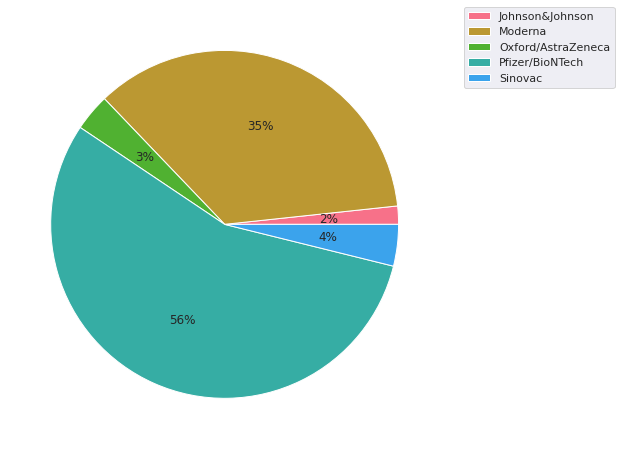

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

def do_pie_plot(x,y):
  plt.figure(figsize = (10,8))
  sns.set(style="darkgrid")
  colors = sns.color_palette('husl')
  plt.pie(y, colors =colors, autopct='%.0f%%')
  plt.legend(labels = x,bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
  plt.show()
  return


x = manu_tot.index.tolist()
y = manu_tot
do_pie_plot(x,y)

This is an interesting data set and I would like to visulaize what the world wide data looks like on an actual map.

I am planning to use geopandas. Hopefully, it should work.

In [7]:
!pip install git+git://github.com/geopandas/geopandas.git

  Cloning git://github.com/geopandas/geopandas.git to /tmp/pip-req-build-_3winpos
  Running command git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-_3winpos
  fatal: remote error:
    The unauthenticated git protocol on port 9418 is no longer supported.
  Please see https://github.blog/2021-09-01-improving-git-protocol-security-github/ for more information.
ERROR: Command errored out with exit status 128: git clone -q git://github.com/geopandas/geopandas.git /tmp/pip-req-build-_3winpos Check the logs for full command output.


In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt
# Task Total vaccinated in the world

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.name
merged = world.set_index('name').join(country_data.set_index('country'))
variable = 'people_fully_vaccinated_per_hundred'

vmin = country_data[variable].min()
vmax = country_data[variable].max()

f, ax = plt.subplots(1, figsize=(18, 12))
ax.set_facecolor('xkcd:dark')
merged.plot(column=variable, cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')
# Create colorbar as a legend
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))
# empty array for the data range
sm._A = []
# add the colorbar to the figure
cbar = f.colorbar(sm)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=vmin, vmax=vmax))


ModuleNotFoundError: ignored

I can now see the people_fully_vaccinated_per_hundred in the world map. We can repeat this for any column. Just change the variable name to the column of interest.

### Exercise 8 - encode daily vaccinations 

1. find the median daily vaccinations per 1 million 
2. write a function to encode daily vaccinations per 1 million, where values greater than or equal to median = 1 and values less than median = 0 

Output: 

1. 1915.5
2. 
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: daily_vaccinations_per_million, Length: 9011, dtype: int64
```

### Exercise 9 - Encoding vaccinations per hundred  
---
The United Kingdom has been praised for its fast vaccine rollout. 
1. find the minimum total vaccinations for the United Kingdom 
2. save this value in a variable rounded down to an integer
3. write a function to encode total_vaccinations column so that all values less than the UK's min are 0 and all values greater than or equal to the UK's min are coded as 1 
4. display the countries which total vaccinated is at the same rate or more than the UK

Output:

1. 1402432.0
2. 1402432
3. `df['people_vaccinated_per_hundred']` should output:
```
0        0
6        0
22       0
44       0
59       0
        ..
14989    0
14990    0
14991    0
14992    0
14993    0
Name: total_vaccinations, Length: 9011, dtype: int64
```
4. 
```
array(['Argentina', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belgium', 'Brazil', 'Cambodia', 'Canada', 'Chile', 'China',
       'Colombia', 'Czechia', 'Denmark', 'Dominican Republic', 'England',
       'Finland', 'France', 'Germany', 'Greece', 'Hong Kong', 'Hungary',
       'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan',
       'Kazakhstan', 'Malaysia', 'Mexico', 'Morocco', 'Nepal',
       'Netherlands', 'Norway', 'Pakistan', 'Peru', 'Philippines',
       'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia',
       'Scotland', 'Serbia', 'Singapore', 'Slovakia', 'South Korea',
       'Spain', 'Sweden', 'Switzerland', 'Thailand', 'Turkey',
       'United Arab Emirates', 'United Kingdom', 'United States',
       'Uruguay', 'Wales'], dtype=object)
```




### Exercise 10 - create new series of total vaccinations percentages
---

To create a new column in your dataframe:

`df['new_column'] = ...`

For example:

* to duplicate an existing column
  * `df['new_column'] = df['old_column']`
* to add two columns together 
  * `df['new_column'] = df['column1'] + df['column2']`
* to make a percentages column 
  * `df['new_column'] = (df['column1']/df['column1].sum()) * 100`  
  


1. read data from 'by_manufacturer' sheet from Covid data 
2. find the sum of total vaccinations for each manufacturer
3. create a new column that has the total vaccinations as a percentage of the overall sum of total vaccinations 
4. find the median percentage 
5. create a new column called 'encoded_percentages' which duplicates the percentages column
6. encode the encoded_percentages column so that any values greater than or equal to the median percentage = 1 and any lesser than = 0 


Output:

1.
2. 
```
vaccine
Johnson&Johnson        264839828
Moderna               5548036383
Oxford/AstraZeneca     539433203
Pfizer/BioNTech       8690461304
Sinovac                604660293
Name: total_vaccinations, dtype: int64
```
3. 
```
	location	date	vaccine	total_vaccinations	percentages
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055
...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519
3294	United States	2021-05-02	Moderna	106780082	0.682413
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423
3296 rows × 5 columns
```
4. 0.0011110194374896931
5. 
6. 
```
	location	date	vaccine	total_vaccinations	percentages	encode	encoded
0	Chile	2020-12-24	Pfizer/BioNTech	420	0.000003	0.000003	0
1	Chile	2020-12-25	Pfizer/BioNTech	5198	0.000033	0.000033	0
2	Chile	2020-12-26	Pfizer/BioNTech	8338	0.000053	0.000053	0
3	Chile	2020-12-27	Pfizer/BioNTech	8649	0.000055	0.000055	0
4	Chile	2020-12-28	Pfizer/BioNTech	8649	0.000055	0.000055	0
...	...	...	...	...	...	...	...
3291	United States	2021-05-01	Moderna	105947940	0.677095	0.677095	1
3292	United States	2021-05-01	Pfizer/BioNTech	129013657	0.824504	0.824504	1
3293	United States	2021-05-02	Johnson&Johnson	8374395	0.053519	0.053519	1
3294	United States	2021-05-02	Moderna	106780082	0.682413	0.682413	1
3295	United States	2021-05-02	Pfizer/BioNTech	130252779	0.832423	0.832423	1
3296 rows × 7 columns
```



# Reflection
----

## What skills have you demonstrated in completing this notebook?

It was a fun worksheet to work with. I got to practice my data retreival, cleaning, grouping, sorting and aggregating, try out using new skills like encoding columns.



## What caused you the most difficulty?

Nothing really. It was fairly straight forward. 